## SVM Kernels

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#  CREATE A SYNTHETIC DATAPOINTS
from sklearn.datasets import make_classification

In [18]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0
)

In [19]:
pd.DataFrame(X)

,0,1
0,-1.219739,1.479349
1,-1.194676,1.206267
2,-1.329636,0.562334
3,-0.624712,1.343815
4,-0.578797,1.705942
...,...,...
995,1.745932,-0.660347
996,2.145187,-0.681952
997,1.690041,-0.895252
998,1.225423,-1.137341


<Axes: xlabel='0', ylabel='1'>

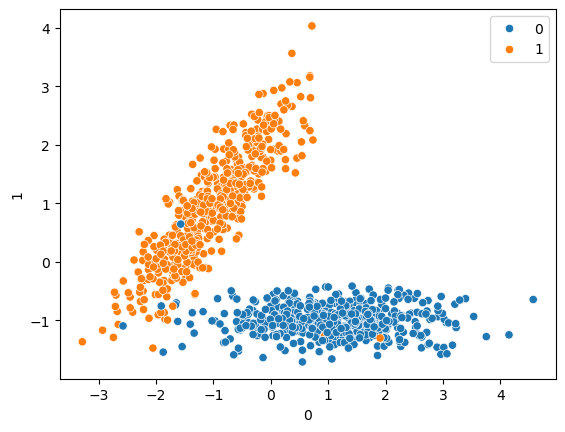

In [20]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [23]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [24]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [26]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [31]:
#prediction
y_pred=svc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       115
           1       1.00      0.99      1.00       135

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[115   0]
 [  1 134]]


<Axes: xlabel='0', ylabel='1'>

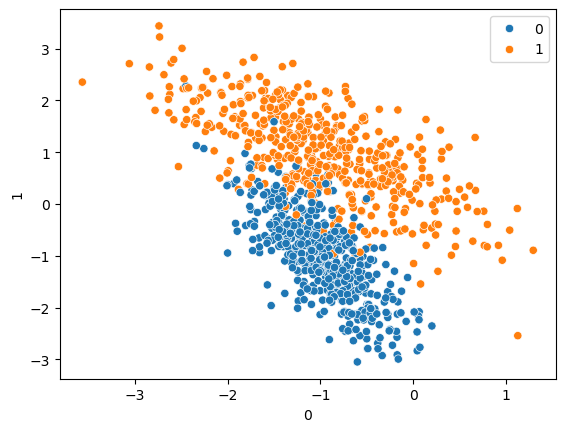

In [60]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)
pd.DataFrame(X)
sns.scatterplot(x=pd.DataFrame(A)[0], y=pd.DataFrame(A)[1], hue=b)

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [62]:
#RBF KERNAL
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.49      0.65       123
           1       0.67      0.99      0.80       127

    accuracy                           0.74       250
   macro avg       0.83      0.74      0.72       250
weighted avg       0.82      0.74      0.73       250

[[ 60  63]
 [  1 126]]


In [63]:
#polynomial KERNAL
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred=polynomial.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       123
           1       0.99      0.94      0.97       127

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[122   1]
 [  7 120]]


In [76]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
#prediction
y_pred2=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       123
           1       0.87      1.00      0.93       127

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[104  19]
 [  0 127]]


In [77]:
sigmoid.intercept_,sigmoid.coef_

AttributeError: coef_ is only available when using a linear kernel

In [72]:
# hyperparameter tuning with SVC
from sklearn.model_selection import GridSearchCV
#defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['rbf']}

In [73]:
grid=GridSearchCV(SVC(),param_grid,refit=True,cv=5,verbose=3)

In [74]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [70]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [71]:
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.49      0.65       123
           1       0.67      0.99      0.80       127

    accuracy                           0.74       250
   macro avg       0.83      0.74      0.72       250
weighted avg       0.82      0.74      0.73       250

[[ 60  63]
 [  1 126]]


In [ ]:
#### day 2

In [78]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [79]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

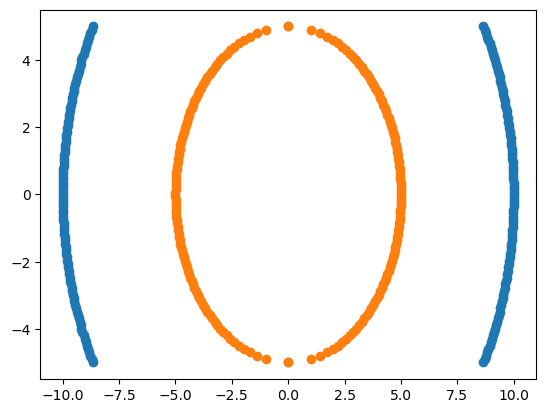

In [80]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [81]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [83]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [84]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [85]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [86]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [87]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [88]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

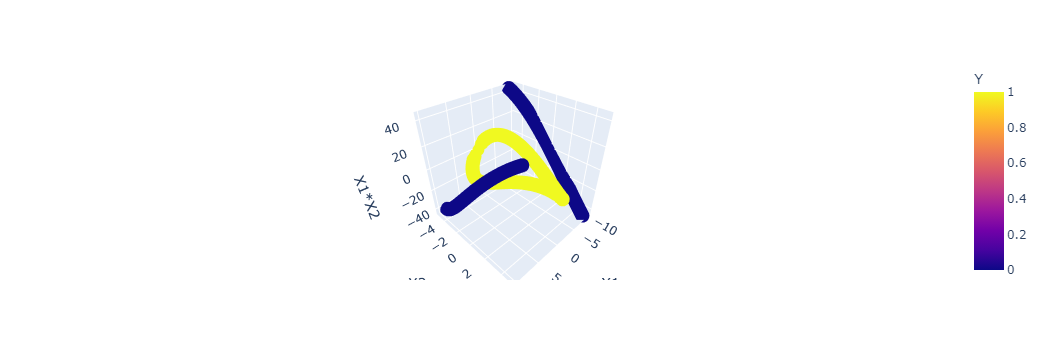

In [91]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

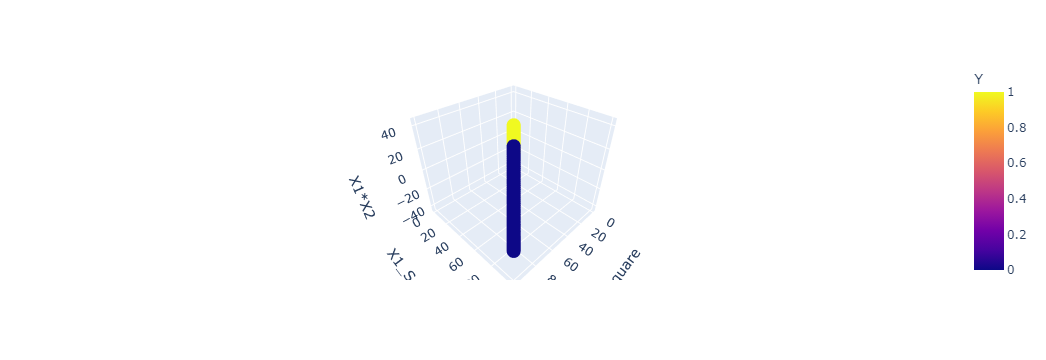

In [92]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

#### Support Vector Regression Implementation


In [149]:
## Dataset (Tips Dataset)
import seaborn as sns
df=sns.load_dataset('tips')

In [150]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [151]:
print(df['sex'].value_counts(),
df['smoker'].value_counts(),
df['day'].value_counts(),
df['time'].value_counts())


sex
Male      157
Female     87
Name: count, dtype: int64 smoker
No     151
Yes     93
Name: count, dtype: int64 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64 time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [152]:
## independnent and dependent features
X=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

In [153]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [154]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2


In [155]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [156]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [157]:

X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

In [158]:
X_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [159]:
## Onehot encoding--- ColumnTrnasformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [160]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],
                                   remainder='passthrough')

In [161]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
X_train=ct.fit_transform(X_train)

In [162]:
X_test=ct.transform(X_test)

In [163]:
X_test

array([[0.  , 1.  , 0.  , 2.  , 0.  , 0.  , 0.  , 3.  ],
       [1.  , 0.  , 0.  , 3.21, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.76, 1.  , 1.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 2.09, 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 5.  , 1.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.51, 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 5.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.6 , 1.  , 0.  , 0.  , 3.  ],
       [0.  , 1.  , 0.  , 5.65, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.5 , 0.  , 1.  , 0.  , 3.  ],
       [0.  , 0.  , 1.  , 1.44, 1.  , 0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  , 3.09, 0.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 1.68,

In [164]:
## SVR--Support Vector Regression
from sklearn.svm import SVR
svr=SVR()

In [165]:
svr.fit(X_train,y_train)

SVR()

In [166]:
y_pred=svr.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.46028114561159283
4.1486423210190235


In [167]:
## Hyperparameter Tuning using GridSearch CV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [168]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [169]:
grid_prediction=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5081618245078687
3.8685147526100234
